## Import Libraries Packages, Downloads

In [1]:
#manipulation and plotting libraries
import numpy as np
import pandas as pd
import warnings
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import math as mt

warnings.filterwarnings('ignore')

In [2]:
#ML libraries
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

## Loading and Processing Data
`Note: (Because none of the processing we are doing involves imputation or such, we are doing the processing before the split)`

In [3]:
warnings.filterwarnings('ignore')


Data = pd.read_csv("/kaggle/input/final-formatted/formatted_data-2.csv")

In [4]:
Data

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,New Jersey,...,max,11,Yes,No,Yes,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:12:14 AM,Running Late,School-Age
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,Manhattan,...,0-30,2,Yes,Yes,No,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:13:34 AM,Running Late,School-Age
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,11/05/2015 08:09:00 AM,11/05/2015 08:13:00 AM,Bronx,...,0-30,8,Yes,Yes,Yes,11/05/2015 08:13:00 AM,NaN,11/05/2015 08:13:22 AM,Running Late,Pre-K
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,11/05/2015 08:12:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,0-30,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:04 AM,Running Late,School-Age
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,11/05/2015 08:13:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,max,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:08 AM,Running Late,School-Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623415,2022-2023,1832905,Pre-K/EI,GV343,5,Mechanical Problem,C601,06/22/2023 02:40:00 PM,06/22/2023 03:26:00 PM,Bronx,...,max,0,Yes,Yes,Yes,06/22/2023 03:26:00 PM,NaN,01/01/1900 12:00:00 AM,Breakdown,Pre-K
623416,2022-2023,1832906,Pre-K/EI,343,VOA#5,Mechanical Problem,C601,06/22/2023 03:28:00 PM,06/22/2023 03:32:00 PM,Bronx,...,31-60,0,Yes,Yes,No,06/22/2023 03:32:00 PM,NaN,01/01/1900 12:00:00 AM,Running Late,Pre-K
623417,2022-2023,1832907,Special Ed PM Run,8015,X604,Mechanical Problem,"07388,07617",06/22/2023 02:45:00 PM,06/22/2023 04:05:00 PM,Bronx,...,max,0,No,No,No,06/22/2023 04:05:00 PM,NaN,01/01/1900 12:00:00 AM,Breakdown,School-Age
623418,2022-2023,1832908,Special Ed PM Run,80131,M450,Won`t Start,"02063,02721",06/22/2023 04:11:00 PM,06/22/2023 04:14:00 PM,Manhattan,...,max,4,Yes,No,No,06/22/2023 04:14:00 PM,NaN,01/01/1900 12:00:00 AM,Breakdown,School-Age


## Plotting

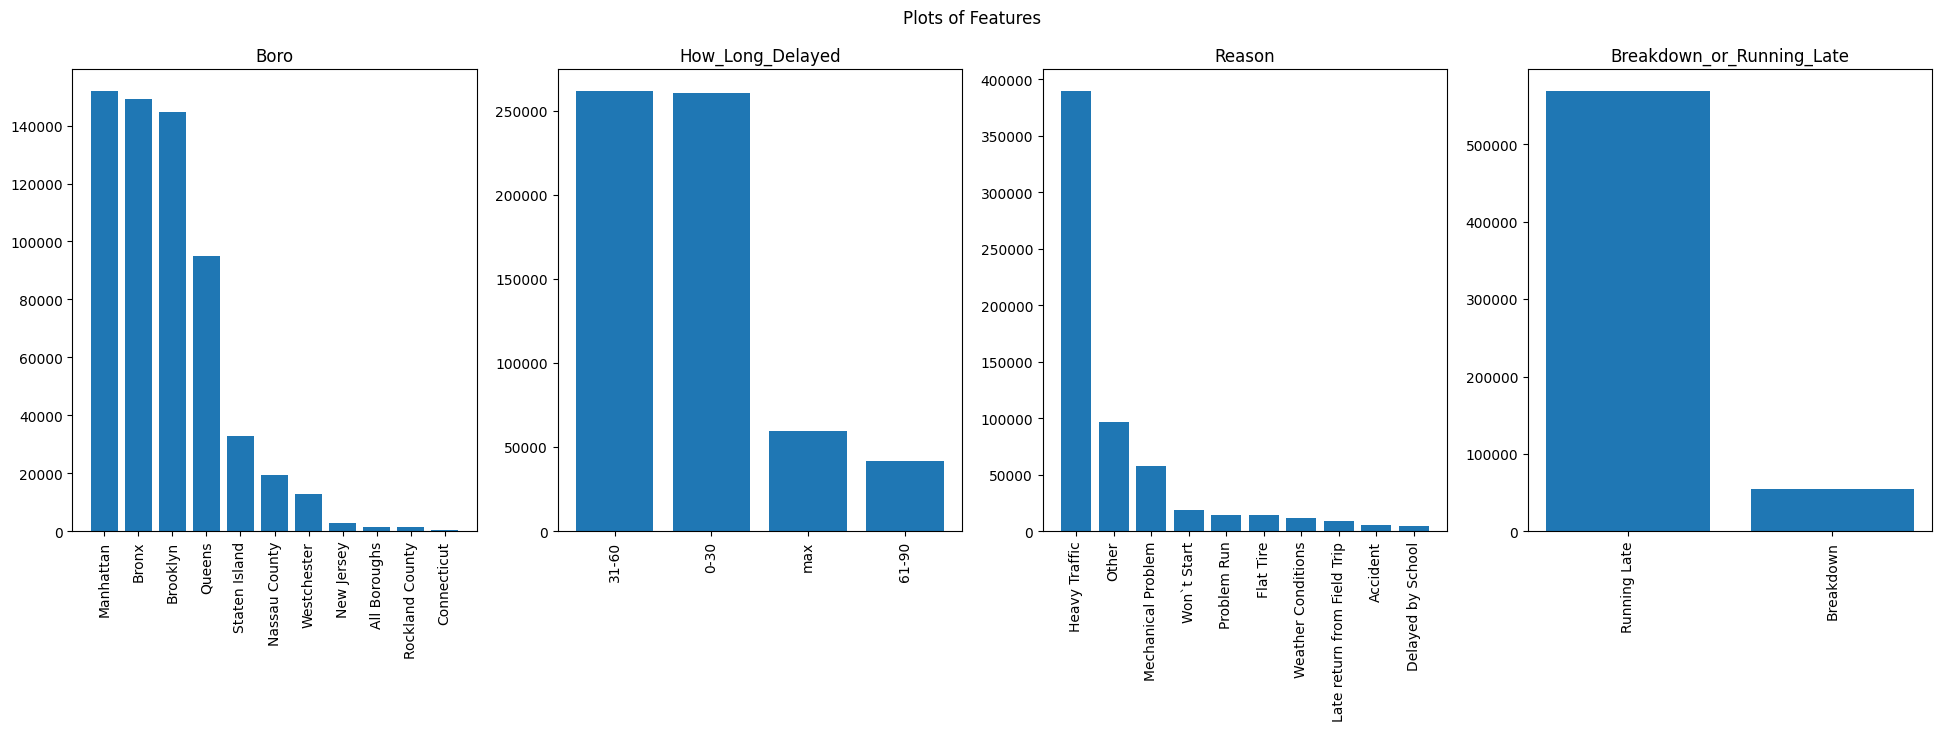

In [5]:
warnings.filterwarnings('ignore')

columns_to_plot_Data = ['Boro','How_Long_Delayed' ,'Reason', 'Breakdown_or_Running_Late']

fig, axs = plt.subplots(1,4, figsize=(24, 6))
fig.suptitle("Plots of Features")
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()

i = 0
for column_name in columns_to_plot_Data:

    counts = Data[column_name].value_counts()
    
    # Rotate the tick labels in the second subplot
    axs[i].bar(counts.index, counts.values)
    axs[i].set_title(f"{column_name}")
    axs[i].set_xticklabels(counts.index, rotation=90)
    i += 1



In [6]:
def process(df): 

    #copy dataframe
    data = df.copy()
    #data.columns = data.columns.astype(str)

    #making a dictionary since we need to do a lot of conversion
    to_binary = {'Yes':1, 'No':0}

    #dropping columns we won't be able to use
    data = data.drop(['Busbreakdown_ID', 'Created_On', 
            'Informed_On','Incident_Number', 
            'Last_Updated_On', 'School_Age_or_PreK', 
            'School_Year', 'Route_Number', 'Schools_Serviced',
            'Run_Type', 'Bus_No', 'Bus_Company_Name'], axis = 1)
    
    data = data.dropna()

    #mapping literals to binary values
    data['Breakdown_or_Running_Late'] = data['Breakdown_or_Running_Late'].map({'Breakdown':1, 'Running Late':0})
    data['Has_Contractor_Notified_Parents'] = data['Has_Contractor_Notified_Parents'].map(to_binary)
    data['Has_Contractor_Notified_Schools'] = data['Has_Contractor_Notified_Schools'].map(to_binary)
    data['Have_You_Alerted_OPT'] = data['Have_You_Alerted_OPT'].map(to_binary)

    #getting month/date values
    data['Occurred_On'] = pd.to_datetime(data['Occurred_On'])
    data['Year'] = data['Occurred_On'].dt.year
    data['Month'] = data['Occurred_On'].dt.month
    data['Day'] = data['Occurred_On'].dt.day
    data['Hour'] = data['Occurred_On'].dt.hour
    data['Mins'] = data['Occurred_On'].dt.minute
    data['Weekday'] = data['Occurred_On'].dt.weekday


    data["sin_month"] = np.sin(2*np.pi*data["Month"]/max(data["Month"]))
    data["cos_month"] = np.cos(2*np.pi*data["Month"]/max(data["Month"]))
    data["sin_hour"] = np.sin(2*np.pi*data["Hour"]/max(data["Hour"]))
    data["cos_hour"] = np.cos(2*np.pi*data["Hour"]/max(data["Hour"]))
    data["sin_mins"] = np.sin(2*np.pi*data["Mins"]/max(data["Mins"]))
    data["cos_mins"] = np.cos(2*np.pi*data["Mins"]/max(data["Mins"]))

    #one hot encode boro
    #data['Boro'] = data['Boro'].fillna('None')
    for boro in data['Boro'].unique():
        data[boro] = (data['Boro'] == boro).astype(int)

    # one hot encode breakdown reason
    for reason in data['Reason'].unique():
        data[reason] = (data['Reason'] == reason).astype(int)

    data = data.drop(['Boro'], axis = 1)
    data = data.drop(['Reason'], axis = 1)

    #plot some features

    i = 0
    columns_to_plot_df = ['Month', 'Day', 'Hour', 'Weekday']

    fig, axs = plt.subplots(1,4, figsize=(24, 6))
    fig.suptitle("Plots of Features")
    fig.subplots_adjust(hspace = .5, wspace=.2)
    axs = axs.ravel()

    for column_name in columns_to_plot_df:
        
        counts = data[column_name].value_counts().sort_index()
        
        # Rotate the tick labels in the second subplot
        axs[i].bar(counts.index, counts.values)
        axs[i].set_title(f"{column_name}")
        i += 1

    data = data.drop(['Occurred_On', 'Month', 'Day', 'Hour', 'Mins'], axis = 1)

    return data


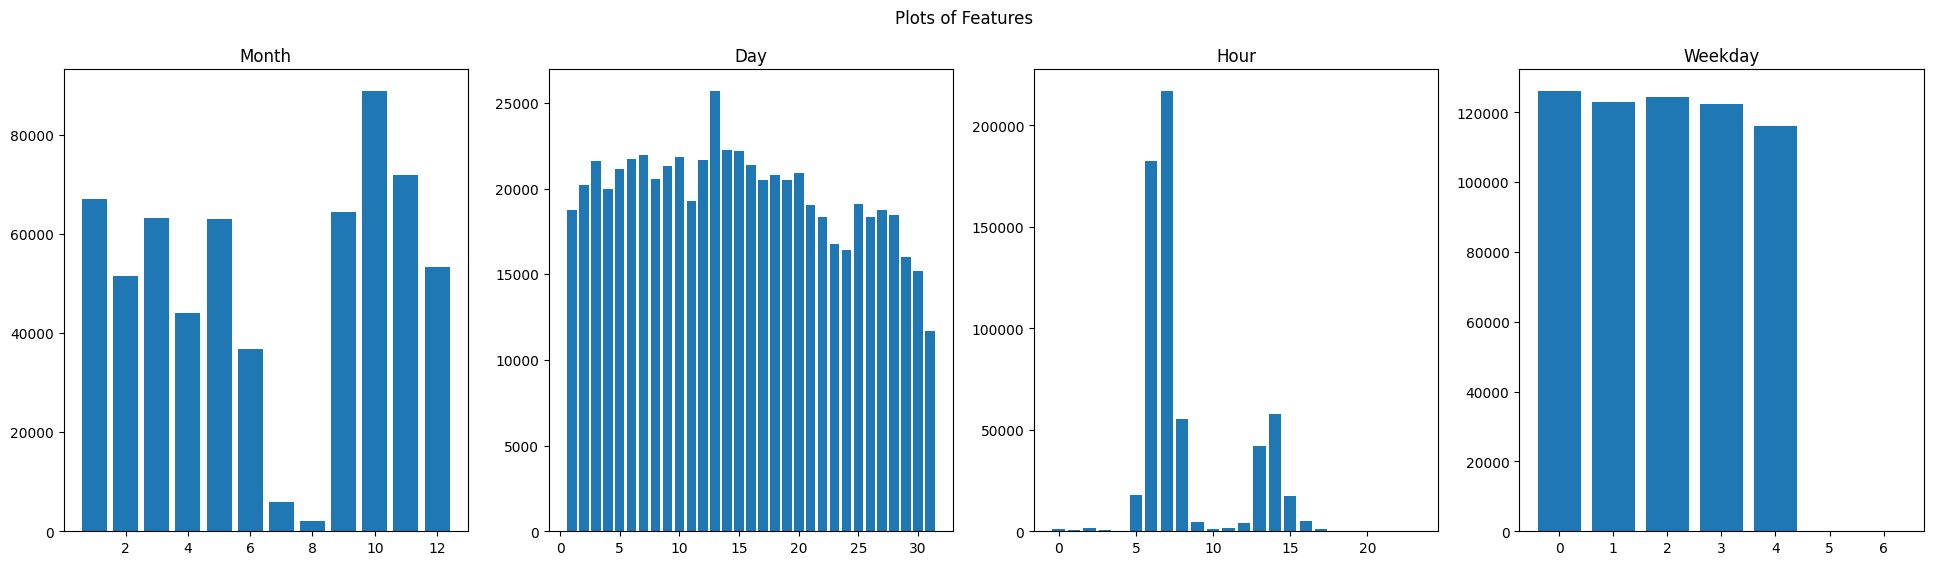

In [7]:
#Process the data
df = process(Data)

### Train Test Split

In [8]:
X = df.drop(['How_Long_Delayed'], axis = 1)
y = df['How_Long_Delayed']

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size= .1)

## Building a Baseline Classifier
#### 1) (Almost) Random Guessing


In [9]:
classes = {0:'0-30', 1: '31-60', 2:'61-90', 3:'91-120', 4:'-1'}

guess = []

for index, row in X_test.iterrows():

    int = 0

    if row.Breakdown_or_Running_Late == 1:
        int = 4
    else:
        int = 1

    guess.append(classes[int])
    
accuracy_score(y_test, guess)



0.42289849390702083

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

Logistic

In [11]:
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1)),
    ('pca', PCA(n_components=3)),
    ('mod', LogisticRegression(multi_class = 'ovr'))
])

logreg_pipe.fit(X_train, y_train_encoded)

train_score_logreg = logreg_pipe.score(X_train, y_train_encoded)
print(f'Logistic Regression Training Score: {train_score_logreg}')

test_score_logreg = logreg_pipe.score(X_test, y_test_encoded)
print(f'Logistic Regression Test Score: {test_score_logreg}')

# Make predictions on the test set
logreg_predictions_encoded = logreg_pipe.predict(X_test)
logreg_predictions_original = label_encoder.inverse_transform(logreg_predictions_encoded)

# Calculate precision, recall, and F1 scores for each label
precision_scores_logreg = precision_score(y_test, logreg_predictions_original, average=None)
recall_scores_logreg = recall_score(y_test, logreg_predictions_original, average=None)
f1_scores_logreg = f1_score(y_test, logreg_predictions_original, average=None)

class_report_logreg = classification_report(y_test, logreg_predictions_original)
print(class_report_logreg)

Logistic Regression Training Score: 0.541678993612978
Logistic Regression Test Score: 0.5392531608350485
              precision    recall  f1-score   support

        0-30       0.49      0.55      0.52     25313
       31-60       0.51      0.54      0.53     25889
       61-90       0.00      0.00      0.00      4211
         max       0.91      0.90      0.90      5805

    accuracy                           0.54     61218
   macro avg       0.48      0.50      0.49     61218
weighted avg       0.51      0.54      0.52     61218



In [12]:
from sklearn.metrics import roc_auc_score, roc_curve

# Make predictions on the test set probabilities for each class
probabilities = logreg_pipe.predict_proba(X_test)

# Calculate AUC score for each class
auc_scores = []
for i in range(probabilities.shape[1]):
    auc_score_class_i = roc_auc_score(y_test_encoded == i, probabilities[:, i])
    auc_scores.append(auc_score_class_i)
    print(f'Logreg AUC Score (Class {i}): {auc_score_class_i}')

# Average AUC scores over all classes
average_auc_score_xgb = np.mean(auc_scores)
print(f'Logreg Average AUC Score: {average_auc_score_xgb}')


Logreg AUC Score (Class 0): 0.6301341115376691
Logreg AUC Score (Class 1): 0.612273166143987
Logreg AUC Score (Class 2): 0.6322976530227093
Logreg AUC Score (Class 3): 0.9686959591023746
Logreg Average AUC Score: 0.7108502224516849


XGB Classifier

In [13]:
from xgboost import XGBClassifier

# pipe = Pipeline(steps=[
#     ('scaler', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=1)),
#     ('mod', XGBClassifier())
# ])

# param_grid = {
#     'mod__n_estimators': [500],  
#     'mod__learning_rate': [0.1],
#     'mod__max_depth': [5],
#     'mod__min_child_weight': [2]
# }


# gridcv = GridSearchCV(pipe,
#                       param_grid=param_grid,
#                       return_train_score=True,
#                       cv=2,
#                       verbose=3)

# gridcv.fit(X_train, y_train_encoded)
# print(f'XGBoost Score: {gridcv.score(X_test, y_test_encoded)}')

In [14]:
# best_params = gridcv.best_params_
# print(f'Best Hyperparameters: {best_params}')

In [15]:
best_params_xgb = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 2,
    'n_estimators': 500
}

best_xgb_model = XGBClassifier(**best_params_xgb)
best_xgb_model.fit(X_train, y_train_encoded)
xgb_predictions_encoded = best_xgb_model.predict(X_test)
xgb_predictions_original = label_encoder.inverse_transform(xgb_predictions_encoded)

precision_scores_xgb = precision_score(y_test, xgb_predictions_original, average=None)
recall_scores_xgb = recall_score(y_test, xgb_predictions_original, average=None)
f1_scores_xgb = f1_score(y_test, xgb_predictions_original, average=None)

scores_df_xgb = pd.DataFrame({
    'Label': label_encoder.classes_,
    'Precision (XGB)': precision_scores_xgb,
    'Recall (XGB)': recall_scores_xgb,
    'F1 Score (XGB)': f1_scores_xgb
})

print(scores_df_xgb)

class_report_xgb = classification_report(y_test, xgb_predictions_original)
print(class_report_xgb)

   Label  Precision (XGB)  Recall (XGB)  F1 Score (XGB)
0   0-30         0.737002      0.775056        0.755550
1  31-60         0.738159      0.750048        0.744056
2  61-90         0.753165      0.508668        0.607229
3    max         0.992107      0.931094        0.960633
              precision    recall  f1-score   support

        0-30       0.74      0.78      0.76     25313
       31-60       0.74      0.75      0.74     25889
       61-90       0.75      0.51      0.61      4211
         max       0.99      0.93      0.96      5805

    accuracy                           0.76     61218
   macro avg       0.81      0.74      0.77     61218
weighted avg       0.76      0.76      0.76     61218



In [16]:
print(f'XGB Test Score: {best_xgb_model.score(X_test, y_test_encoded)}')

XGB Test Score: 0.760952660982064


In [17]:
from sklearn.metrics import roc_auc_score, roc_curve

# Make predictions on the test set probabilities for each class
probabilities = best_xgb_model.predict_proba(X_test)

# Calculate AUC score for each class
auc_scores = []
for i in range(probabilities.shape[1]):
    auc_score_class_i = roc_auc_score(y_test_encoded == i, probabilities[:, i])
    auc_scores.append(auc_score_class_i)
    print(f'XGB AUC Score (Class {i}): {auc_score_class_i}')

# Average AUC scores over all classes
average_auc_score_xgb = np.mean(auc_scores)
print(f'XGB Average AUC Score: {average_auc_score_xgb}')

# Optionally, you can print the AUC score for each class separately


XGB AUC Score (Class 0): 0.8817324088899114
XGB AUC Score (Class 1): 0.8721179649424674
XGB AUC Score (Class 2): 0.9416790845430928
XGB AUC Score (Class 3): 0.9973324511937942
XGB Average AUC Score: 0.9232154773923165


Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

# pipe = Pipeline(steps=[
#     ('scaler', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=1)),
#     ('mod', RandomForestClassifier())
# ])

# param_grid = {
#     'mod__n_estimators': [50, 100, 200],         
#     'mod__max_depth': [30],         
#     'mod__min_samples_split': [10],          
#     'mod__min_samples_leaf': [1]
# }

# gridcv = GridSearchCV(pipe,
#                       param_grid=param_grid,
#                       return_train_score=True,
#                       cv=2,
#                       verbose=3)

# gridcv.fit(X_train, y_train_encoded)

# print(f'Best Hyperparameters: {gridcv.best_params_}')
# print(f'Random Forest Score: {gridcv.score(X_test, y_test_encoded)}')

In [19]:
best_params = {
    'max_depth': 30,
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'n_estimators': 200
}

best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train_encoded)

train_score = best_rf_model.score(X_train, y_train_encoded)
print(f'Random Forest Training Score: {train_score}')

print(f'Random Forest Test Score: {best_rf_model.score(X_test, y_test_encoded)}')

Random Forest Training Score: 0.8895656861374943
Random Forest Test Score: 0.7924466660132641


Evaluation

In [20]:
rf_predictions_encoded = best_rf_model.predict(X_test)
rf_predictions_original = label_encoder.inverse_transform(rf_predictions_encoded)

In [21]:
result_df = pd.DataFrame({'Actual_encoded': y_test_encoded, 'Actual': y_test, 'Predicted_encoded': rf_predictions_encoded, 'Predicted': rf_predictions_original})
result_df

,Actual_encoded,Actual,Predicted_encoded,Predicted
171895,0,0-30,0,0-30
607760,1,31-60,1,31-60
175254,3,max,3,max
108654,0,0-30,0,0-30
142505,1,31-60,1,31-60
...,...,...,...,...
263727,1,31-60,1,31-60
530045,1,31-60,1,31-60
197994,1,31-60,1,31-60
405238,1,31-60,0,0-30


In [22]:
result_df[result_df['Actual_encoded'] == 4]

,Actual_encoded,Actual,Predicted_encoded,Predicted


In [23]:
# Calculate precision, recall, and F1 scores for each label
precision_scores = precision_score(y_test, rf_predictions_original, average=None)
recall_scores = recall_score(y_test, rf_predictions_original, average=None)
f1_scores = f1_score(y_test, rf_predictions_original, average=None)

# Create a DataFrame to display the scores
scores_df = pd.DataFrame({
    'Label': label_encoder.classes_,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Display the DataFrame
print(scores_df)

# Alternatively, you can use classification_report for a more detailed report
class_report = classification_report(y_test, rf_predictions_original)
print(class_report)

   Label  Precision    Recall  F1 Score
0   0-30   0.767995  0.806740  0.786891
1  31-60   0.773417  0.783962  0.778654
2  61-90   0.811429  0.573261  0.671862
3    max   0.994456  0.926960  0.959522
              precision    recall  f1-score   support

        0-30       0.77      0.81      0.79     25313
       31-60       0.77      0.78      0.78     25889
       61-90       0.81      0.57      0.67      4211
         max       0.99      0.93      0.96      5805

    accuracy                           0.79     61218
   macro avg       0.84      0.77      0.80     61218
weighted avg       0.79      0.79      0.79     61218



In [24]:
# Calculate precision, recall, and F1 scores using micro-averaging
precision_micro = precision_score(y_test, rf_predictions_original, average='micro')
recall_micro = recall_score(y_test, rf_predictions_original, average='micro')
f1_micro = f1_score(y_test, rf_predictions_original, average='micro')

# Display micro-averaged scores
print(f'Micro-Averaged Precision: {precision_micro:.4f}')
print(f'Micro-Averaged Recall: {recall_micro:.4f}')
print(f'Micro-Averaged F1 Score: {f1_micro:.4f}')

# Calculate precision, recall, and F1 scores for each label
precision_scores = precision_score(y_test, rf_predictions_original, average=None)
recall_scores = recall_score(y_test, rf_predictions_original, average=None)
f1_scores = f1_score(y_test, rf_predictions_original, average=None)

# Create a DataFrame to display the scores
scores_df = pd.DataFrame({
    'Label': label_encoder.classes_,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Display the DataFrame
print("\nLabel-wise Scores:")
print(scores_df)

class_report = classification_report(y_test, rf_predictions_original)
print("\nClassification Report:")
print(class_report)


Micro-Averaged Precision: 0.7924
Micro-Averaged Recall: 0.7924
Micro-Averaged F1 Score: 0.7924

Label-wise Scores:
   Label  Precision    Recall  F1 Score
0   0-30   0.767995  0.806740  0.786891
1  31-60   0.773417  0.783962  0.778654
2  61-90   0.811429  0.573261  0.671862
3    max   0.994456  0.926960  0.959522

Classification Report:
              precision    recall  f1-score   support

        0-30       0.77      0.81      0.79     25313
       31-60       0.77      0.78      0.78     25889
       61-90       0.81      0.57      0.67      4211
         max       0.99      0.93      0.96      5805

    accuracy                           0.79     61218
   macro avg       0.84      0.77      0.80     61218
weighted avg       0.79      0.79      0.79     61218



In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

# Make predictions on the test set probabilities for each class
probabilities = best_rf_model.predict_proba(X_test)

# Calculate AUC score for each class
auc_scores = []
for i in range(probabilities.shape[1]):
    auc_score_class_i = roc_auc_score(y_test_encoded == i, probabilities[:, i])
    auc_scores.append(auc_score_class_i)
    print(f'RF AUC Score (Class {i}): {auc_score_class_i}')

# Average AUC scores over all classes
average_auc_score_xgb = np.mean(auc_scores)
print(f'RF Average AUC Score: {average_auc_score_xgb}')

RF AUC Score (Class 0): 0.9077762747953071
RF AUC Score (Class 1): 0.9006433257206836
RF AUC Score (Class 2): 0.9556712543940232
RF AUC Score (Class 3): 0.9960239493921248
RF Average AUC Score: 0.9400287010755346
